# Clusterização
Etapas e suas subpartes visualizaturas:
- Agrupando dataset wine do sklearn
- Descrevendo as duas métricas
- Comparando agrupamentos dentro de X = { n | 2 ≥ n ≤ 3 }
- Empregando a _Silhouete Score_ para avaliar qualidade do agrupamento
- Empregando a _Davies-Bouldin Index_ para avaliar qualidade do agrupamento

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

# Carregando o dataset "wine"
wine = load_wine()
X = wine.data  # Dados (características químicas dos vinhos)
y = wine.target  # Classes reais dos vinhos (para comparação)

df = DataFrame( data=wine.data )
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


O que são as tais métricas usadas em avaliação de agrupamentos ?

## Silhouette score

É uma métrica empregada na avaliação da qualidade dos aglomerados criados por algoritmos de agrupamentos. Ele indica solução a pergunta: Quão bem uma amostra está relacionada com seu próprio aglomerado em comparação a outros aglomerados ?

Cada ponto identificado por "i":

a(i) ← Distância média para os pontos do mesmo aglomerado.

b(i) ← Distância média para os pontos do(s) aglomerado(s) alheio(s).

Matematicamente definido como
s(i) igual a diferença entre b(i) e a(i) sobre a(i) se maior que b(i) ou b(i) se maior que a(i)

![Silhouette](./calc3.png)

Resulta em:
-  1  ponto bem dentro do seu aglomerado
-  0  ponto está na fronteira entre aglomerados
- -1  ponto está foragido de seu aglomerado de natureza (ruim)

O valor resultante é { x | -1 > x < 1 }.

Os aglomerados serão tidos como bons, se: cada aglomerado é
compacto e os aglomerados são bem separados.

Deve-se testar a alteração do valor de número de aglomerados
do algoritmo de modo a mutar o coeficiente obtido. Quanto mais
proximo de 1 melhor será seus aglomerados.

## Davies bouldin score
Outra métrica com a mesma finalidade da anterior. Difere do silhouette score por medir a relação entre o grau de compactação e o grau de separação dos aglomerados.

Para um conjunto K de aglomerados tem-se:

### _Compacidade_ Si

Mede o quão compacto um aglomerado i está.
É Calculado como a distância média entre os pontos dentro do aglomerado i e seu centroide(centro de "massa" da figura geométrica plana criada pela interconexão entre os pontos mais externos do aglomerado)

### _Separação_ Mij

Mede a distância entre os centróides dos aglomerados i e j

### _Razão de similaridade_ Rij
Para cada par de aglomerados i e j, calcula-se:

![RazaoSimilaridade](./calc2.png)

### _Índicie de Davies-Bouldin DB_
É a média do maior valor de Rij para cada aglomerado i:

![indicieDeDaviesBouldin](./calc.png)

A interpretação do coeficiente resultante é feita de forma que valores pequenos são tidos como indicadores de aglomerados mais
compactos e bem separados.


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Para kmeans_list posição:{i}
Índice de Davies-Bouldin: 1.629
Coeficiente de Silhouette: 0.657.


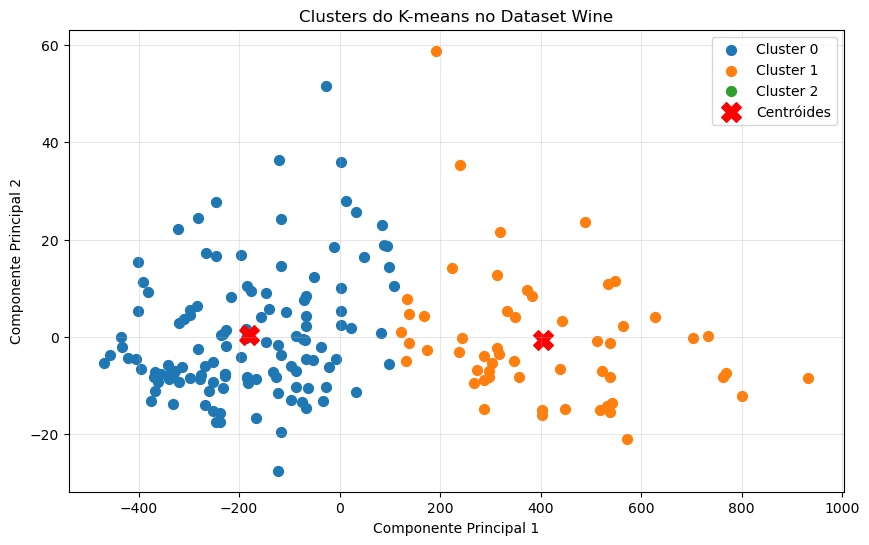

Tabela de Comparação (Clusters vs Classes Reais):
          Cluster 0  Cluster 1  Cluster 2
Classe 0          9         50          0
Classe 1         67          4          0
Classe 2         47          1          0
Para kmeans_list posição:{i}
Índice de Davies-Bouldin: 3.364
Coeficiente de Silhouette: 0.571.


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


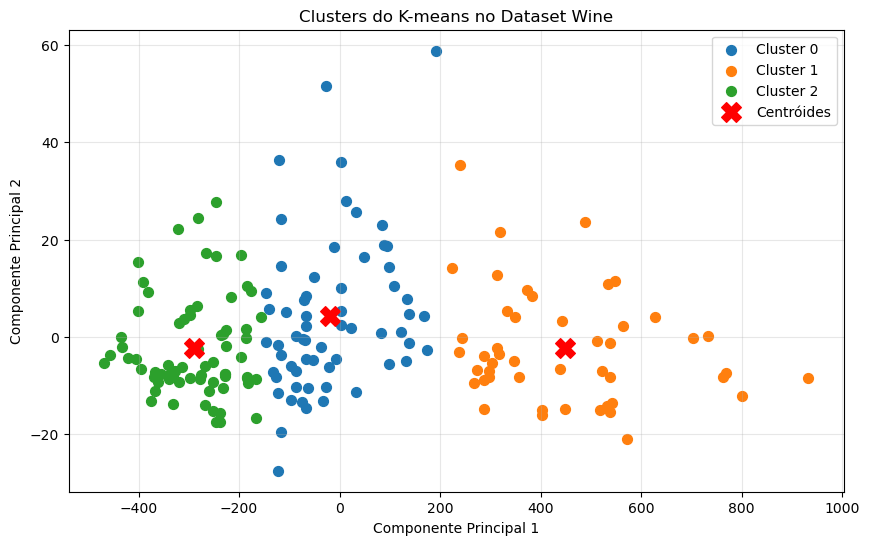

Tabela de Comparação (Clusters vs Classes Reais):
          Cluster 0  Cluster 1  Cluster 2
Classe 0         13         46          0
Classe 1         20          1         50
Classe 2         29          0         19


In [16]:

# Aplicando K-means com N clusters (o número de classes reais no dataset é 3)
kmeans_list = [0,1]
y_kmeans_list = [0,1]
for i in range(2,4):
    kmeans_list.append( KMeans(n_clusters=i, random_state=42) )
    y_kmeans_list.append( kmeans_list[i].fit_predict(X) )

    # Avaliando o modelo com a métrica Silhouette_score
    silhouette_avg = silhouette_score(X, y_kmeans_list[i])

    # Padronizar os dados (para normalizar a escala das variáveis)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Calcular o Índice de Davies-Bouldin
    dbi = davies_bouldin_score(X_scaled, y_kmeans_list[i])
    
    print("Para kmeans_list posição:{i}")
    print(f"Índice de Davies-Bouldin: {dbi:.3f}")
    print(f"Coeficiente de Silhouette: {silhouette_avg:.3f}.")

    # Reduzindo para 2 dimensões com PCA (para visualização)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Visualizando os clusters formados
    plt.figure(figsize=(10, 6))
    for cluster in range(3):
        plt.scatter(
            X_pca[y_kmeans_list[i] == cluster, 0], X_pca[y_kmeans_list[i] == cluster, 1],
            label=f"Cluster {cluster}", s=50
        )

    # Centróides dos clusters
    centroids_pca = pca.transform(kmeans_list[i].cluster_centers_)
    plt.scatter(
        centroids_pca[:, 0], centroids_pca[:, 1],
        s=200, c='red', marker='X', label='Centróides'
    )

    plt.title("Clusters do K-means no Dataset Wine")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # Comparando os clusters com as classes reais
    print("Tabela de Comparação (Clusters vs Classes Reais):")
    from sklearn.metrics import confusion_matrix
    import pandas as pd
    conf_matrix = confusion_matrix(y, y_kmeans_list[i])
    conf_df = pd.DataFrame(conf_matrix, columns=[f"Cluster {i}" for i in range(3)],
                           index=[f"Classe {i}" for i in range(3)])
    print(conf_df)
